In [1]:
import PIL
from PIL import Image
import numpy as np
import torch
import torch.nn.functional as F

In [3]:
# test_img = Image.open("./tmp/0.png")
test_img = Image.open("puzzle.png")
image = np.array(test_img)
image.shape

(44, 260, 3)

In [4]:
def crop_white_border(image):
    white = 255
    black = 0
    _image = image.copy()
    if image.ndim == 3 and image.shape[2] == 3:
        _image = np.mean(image, axis=2, dtype=int)

    non_white_mask = _image < white
    non_white_rows = np.any(non_white_mask, axis=1)
    non_white_cols = np.any(non_white_mask, axis=0)

    row_start = np.argmax(non_white_rows)
    row_end = len(non_white_rows) - np.argmax(non_white_rows[::-1])
    col_start = np.argmax(non_white_cols)
    col_end = len(non_white_cols)-  np.argmax(non_white_cols[::-1])
    cropped_image = image[row_start:row_end, col_start:col_end]
    # cropped_image = np.expand_dims(cropped_image, 2)
    # print(cropped_image)
    # Image.fromarray((cropped_image).astype(np.uint8))
    return cropped_image

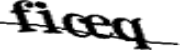

In [5]:
import einops
processed_image = crop_white_border(image)

torch_image = torch.from_numpy(processed_image/255).to(torch.float32)
torch_image = einops.rearrange(torch_image, "h w c -> 1 c h w")
Image.fromarray(processed_image).convert('LA').resize((180, 50), resample=Image.BILINEAR)

In [107]:
# np.array(Image.fromarray(processed_image).convert('LA').resize((180, 50), resample=Image.BILINEAR)).shape
np.mean(image, axis=2, keepdims=True, dtype=float) /255

array([[[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [93]:
kernel = torch.ones((1, 3, 3, 1), dtype=torch.float32)
# kernel = torch.tensor([[[[1, 0],[0, -1]]]])
# print(kernel.shape)
convolved = F.conv2d(torch_image, kernel, stride=(1,1), padding=0)
print(convolved.shape)
convolved = einops.rearrange(torch_image[0], "c h w -> h w c")
Image.fromarray(convolved[0].numpy()).show()

torch.Size([1, 1, 29, 95])
